In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
import pandas as pd

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
import numpy as np
import random
from collections import OrderedDict
import matplotlib.pyplot as plt
import math

In [ ]:
def MCSim(num_codes, num_samples, samples_count,threshold):
  bunique = []
  for i in range(num_samples):
    # get a random sample (w replacement, for no replacement use random.sample()) of values in range of the number of codes. amount of samples = samples_to_count
    barcodes = random.choices(range(num_codes), k=samples_count)

    unique_barcodes = list(OrderedDict.fromkeys(barcodes)) # get unique items and preserve order (.fromkeys only allows one of each key)
    #uncomment the below to get a printout of the proportion of unique barcodes randomly selected for each simulation run
    #print(len(unique_barcodes)/samples_count)
    if len(unique_barcodes)/samples_count >= threshold: # if the proportion of unique barcodes is greater tham or equal to my "allowed cutoff", increase my counter
      #print(len(unique_barcodes)) # check and make sure length it is selecting for is correct.
      bunique.append(1)

  counts_correct = len(bunique)
  count_accuracy = (counts_correct/num_samples) * 100 # how many runs in my simulation satisfied my "accuracy" threshold?
  #print(counts_correct)
  #print(count_accuracy)
  return count_accuracy


In [ ]:
number_of_codes = 5376 # number barcodes to use
samples_to_count = 22500 # number unique items to count  ----> how many beads we want to include/our sample size?
number_of_samples = 10  # number of times to run the simulation -->
thresholds = [.9]
 # list to store all sampled values


0
0.1882470656387468
0.8117529343612532
1
0.31437259961670716
0.497380334744546
2
0.26250112067995046
0.23487921406459555
3
0.1461256238451724
0.0887535902194232
4
0.06100744795535948
0.02774614226406369
5
0.020376487617090062
0.007369654646973589
6
0.005671455720090068
0.0016981989268834985
7
0.0013530472932214877
0.00034515163366199975
8
0.00028244862245998555
6.270301120203658e-05
9
5.240991105646397e-05
1.0293100145553069e-05
10
8.752455146429484e-06
1.5406449991317572e-06
11
1.3287818267761126e-06
2.1186317233912177e-07
12
1.8492213755967566e-07
2.6941034736438496e-08
13
2.3755382286512176e-08
3.1856524085327464e-09
14
2.83367774417681e-09
3.5197467163072815e-10
15
3.154827888516848e-10
3.649192059640427e-11
16
3.292851608639461e-11
3.5633718198369024e-12
17
3.234742462604646e-12
3.2862601528904634e-13
18
3.0011221736387545e-13
2.853273173286652e-14
19
2.6378284368298526e-14
2.1094237467877974e-15


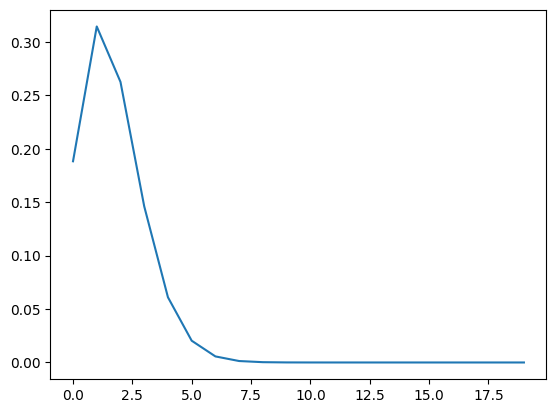

In [ ]:
def poisson(rangek = 20):
  sum = 0
  plist = []
  for i in range(rangek):
    print(i)
    lamda = 1.67
    k  = i
    p = ((lamda ** k) * (math.exp(-1*lamda))/math.factorial(k))
    sum += p
    print(p)
    print(1-sum)
    plist.append(p)
  plt.plot(plist)

poisson(rangek = 20)


In [ ]:
# run the MC simulation multiple times (changing the value of samples_to_count) to assess effect of changing samples to count on count accuracy
fig = plt.figure()
plt.title("Monte Carlo," + str(number_of_samples) + "simulations")
plt.xlabel("samples_to_count")
plt.ylabel("Prediction Accuracy (%)")
#plt.xlim(0, )
for t in thresholds:
  samples = []
  accuracies = []
  for i in range(1, samples_to_count, 1):
    accuracy = MCSim(num_codes = number_of_codes, num_samples = number_of_samples, samples_count = i, threshold = t)
    samples.append(i)
    accuracies.append(accuracy)
  plt.plot(samples, accuracies, alpha = 0.5)
fig.legend(thresholds)


plt.savefig('MonteCarlo_beads_full.svg')
plt.show()